In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Import Data Now


In [15]:
anime = pd.read_csv('./input/anime.csv')
manga = pd.read_csv('./input/manga.csv')

#%matplotlib inline

print(anime.columns.values)
print(manga.columns.values)



['id' 'title' 'media_type' 'mean' 'num_scoring_users' 'status'
 'num_episodes' 'start_date' 'end_date' 'source' 'num_list_users'
 'popularity' 'num_favorites' 'rank' 'average_episode_duration' 'rating'
 'start_season_year' 'start_season_season' 'broadcast_day_of_the_week'
 'broadcast_start_time' 'genres' 'studios' 'synopsis' 'nsfw' 'created_at'
 'updated_at' 'main_picture_medium' 'main_picture_large'
 'alternative_titles_en' 'alternative_titles_ja'
 'alternative_titles_synonyms']
['id' 'title' 'media_type' 'mean' 'num_scoring_users' 'status'
 'num_volumes' 'num_chapters' 'start_date' 'end_date' 'num_list_users'
 'popularity' 'num_favorites' 'rank' 'genres' 'authors' 'synopsis' 'nsfw'
 'created_at' 'updated_at' 'main_picture_medium' 'main_picture_large'
 'alternative_titles_en' 'alternative_titles_ja'
 'alternative_titles_synonyms']


**Project Planning**
Outline the goals and rough outline of what I want to do in this project


In [16]:
# Explore interesting themes 
    # Manga score correlation to Anime score
    # If Anime airs while manga is still in progress -- ??
    # Number of episodes affects score
    # Source is from manga or light novel affects score
    # broadcast day of the week affects score
    # Average episode duration affects score
    # Season the anime is featured in?
    # How much does a better studio affect score -- ??
    # Does the anime/ manga being nsfw affect score
    # Number of volumes or chapters affect anime score
    # creation date of the manga -> date of anime
    # Genre affect score
    # popularity of anime / manga correlated with mean score?
    

Look into what data types I am work with

In [17]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24012 entries, 0 to 24011
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24012 non-null  int64  
 1   title                        24012 non-null  object 
 2   media_type                   24012 non-null  object 
 3   mean                         14153 non-null  float64
 4   num_scoring_users            24012 non-null  int64  
 5   status                       24012 non-null  object 
 6   num_episodes                 24012 non-null  int64  
 7   start_date                   21160 non-null  object 
 8   end_date                     19719 non-null  object 
 9   source                       20238 non-null  object 
 10  num_list_users               24012 non-null  int64  
 11  popularity                   20538 non-null  float64
 12  num_favorites                24012 non-null  int64  
 13  rank            

In [18]:
anime.describe()

,id,mean,num_scoring_users,num_episodes,num_list_users,popularity,num_favorites,rank,start_season_year
count,24012.000000,14153.000000,2.401200e+04,24012.000000,2.401200e+04,20538.000000,24012.000000,18643.000000,17553.000000
mean,28454.776987,6.456604,1.747025e+04,15.853906,3.397121e+04,10269.502775,399.034483,9321.999678,2007.436507
std,17185.886105,0.899437,8.714345e+04,49.475215,1.445167e+05,5928.956203,4053.519864,5381.914204,13.493021
min,1.000000,1.850000,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1917.000000
25%,9989.750000,5.850000,2.300000e+01,1.000000,1.440000e+02,5135.250000,0.000000,4661.500000,2002.000000
50%,33742.000000,6.460000,2.370000e+02,2.000000,8.905000e+02,10269.500000,1.000000,9322.000000,2012.000000
75%,43920.500000,7.110000,3.052000e+03,13.000000,8.454750e+03,15404.000000,15.000000,13982.500000,2017.000000
max,52172.000000,9.140000,2.459371e+06,3057.000000,3.438932e+06,20538.000000,202552.000000,18643.000000,2023.000000


In [19]:
#look at numeric and categorical values separately 
anime_num = anime[['mean', 'num_episodes', 'popularity', 'start_season_year', 'rank', 'num_favorites', 'num_scoring_users']]
anime_cat = anime[['mean', 'source', 'average_episode_duration', 'start_season_season', 'broadcast_day_of_the_week', 'nsfw']]

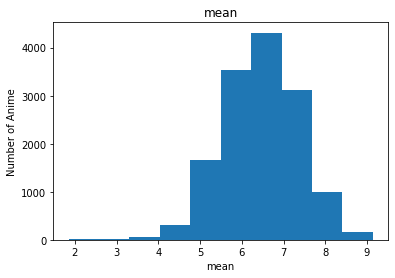

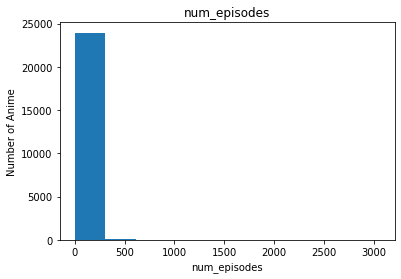

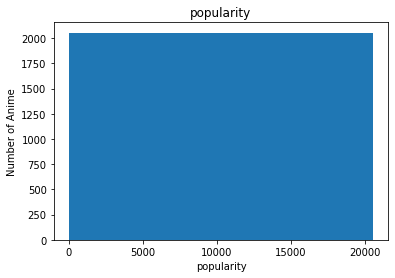

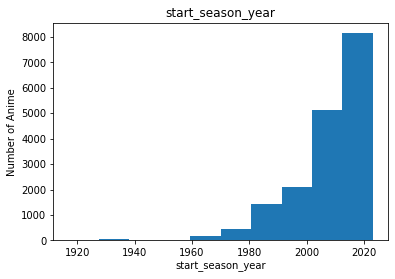

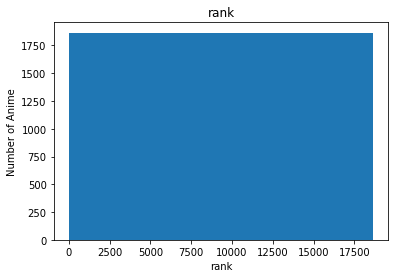

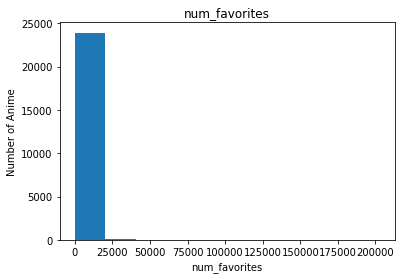

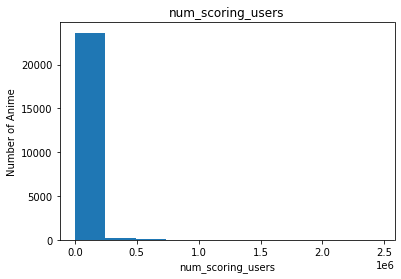

In [20]:
#distributions for all numeric variables 
for i in anime_num.columns:
    plt.hist(anime_num[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Number of Anime')
    plt.show()

                       mean  num_episodes  popularity  start_season_year  \
mean               1.000000      0.086787   -0.678696           0.185862   
num_episodes       0.086787      1.000000    0.023390          -0.088774   
popularity        -0.678696      0.023390    1.000000          -0.135954   
start_season_year  0.185862     -0.088774   -0.135954           1.000000   
rank              -0.975293      0.001030    0.859118          -0.100140   
num_favorites      0.238413      0.039392   -0.176754           0.034095   
num_scoring_users  0.351293      0.022296   -0.342151           0.087377   

                       rank  num_favorites  num_scoring_users  
mean              -0.975293       0.238413           0.351293  
num_episodes       0.001030       0.039392           0.022296  
popularity         0.859118      -0.176754          -0.342151  
start_season_year -0.100140       0.034095           0.087377  
rank               1.000000      -0.173647          -0.307421  
num_fav

<AxesSubplot:>

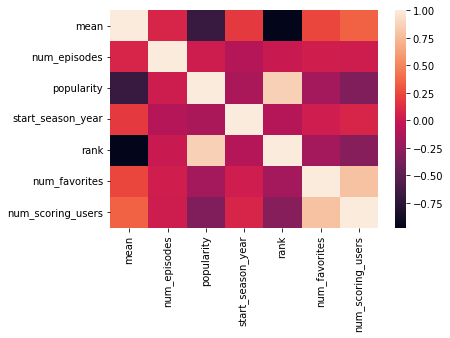

In [21]:
print(anime_num.corr())
sns.heatmap(anime_num.corr())

In [22]:
#compare number of episodes with mean
pd.pivot_table(anime, index = 'mean', values = ['num_episodes'])

,num_episodes
mean,
1.85,1.0
1.99,1.0
2.21,1.0
2.22,1.0
2.25,1.0
...,...
9.04,7.0
9.05,99.5
9.07,10.0


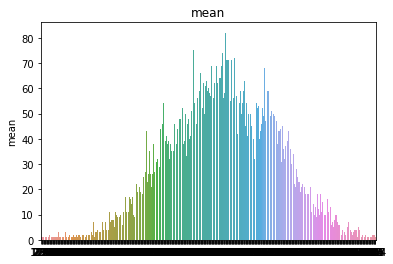

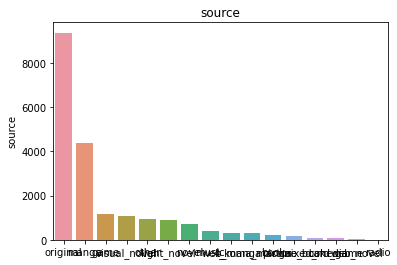

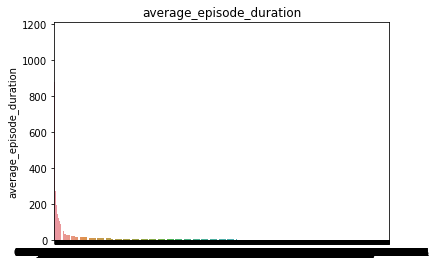

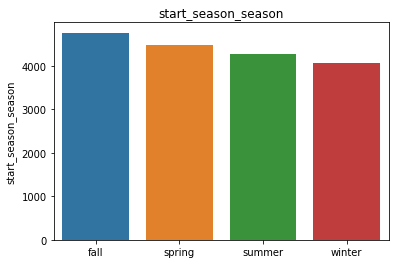

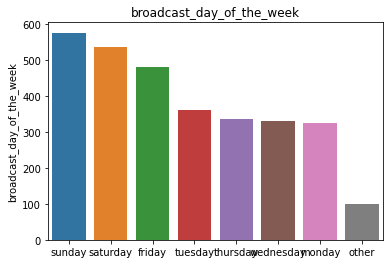

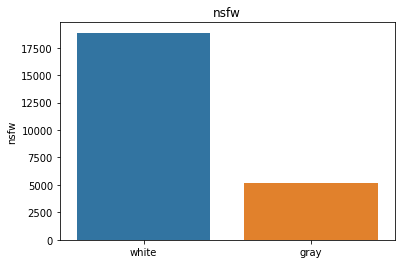

In [23]:
for i in anime_cat.columns:
    x = anime_cat[i].value_counts().index
    y = anime_cat[i].value_counts()
    sns.barplot(x = x, y = y).set_title(i)
    plt.show()
    

,start_season_season,mean
0,fall,6.527659
1,spring,6.551436
2,summer,6.477027
3,winter,6.505425


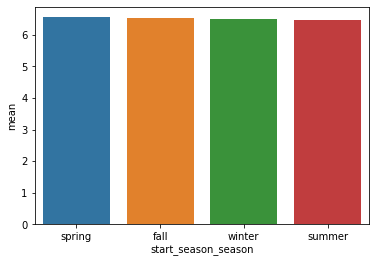

In [24]:
#See if start season has any correlation with mean score

seasonScore = anime
#graph visualization
x = 'start_season_season'
y = 'mean'
p = sns.barplot(x = x, y = y, data = seasonScore, ci = False)

#table
seasonScore = anime
seasonScore.groupby('start_season_season', as_index = False)['mean'].mean()

,nsfw,mean
0,gray,6.148951
1,white,6.499306


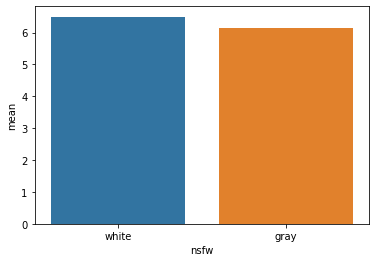

In [25]:
#See if nsfw has any correlation with mean score
seasonScore = anime
#Graph visualization 
x = 'nsfw'
y = 'mean'
p = sns.barplot(x = x, y = y, data = seasonScore, ci = False)

#table visualization
seasonScore.groupby('nsfw', as_index = False)['mean'].mean()

What I learned about anime...
* Mean Score and number of episodes have no correlation
* Mean score follows a normal distribution
* Most anime tend to be an original anime rather than from manga or light novel
* start season of the anime is very even among all the seasons
* Anime tend to be aired on the weekend / fridays
* Most anime are not NSFW
* how popular an anime is a moderate correlation to score but not strong
* Start season has no correlation with mean score

In [26]:
manga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66481 entries, 0 to 66480
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           66481 non-null  int64  
 1   title                        66481 non-null  object 
 2   media_type                   66481 non-null  object 
 3   mean                         21621 non-null  float64
 4   num_scoring_users            66481 non-null  int64  
 5   status                       66481 non-null  object 
 6   num_volumes                  66481 non-null  int64  
 7   num_chapters                 66481 non-null  int64  
 8   start_date                   62212 non-null  object 
 9   end_date                     51323 non-null  object 
 10  num_list_users               66481 non-null  int64  
 11  popularity                   59273 non-null  float64
 12  num_favorites                66481 non-null  int64  
 13  rank            